In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!rm -rf '/content/cats_vs_dogs_small'

In [3]:
!unzip -qq '/content/drive/MyDrive/Colab_Notebooks/SECONDYEAR_TRIMESTER4_Module03_deep-learning-applications/DAY3_APPLICATION_OF_DEEP_LEARNING/dogs_cats.zip'

In [4]:
import os, shutil, pathlib

original_dir = pathlib.Path("dogs_cats/train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,dst=dir / fname)
  
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [5]:
from keras import layers
from keras import models

train_dir="/content/cats_vs_dogs_small/train"
validation_dir="/content/cats_vs_dogs_small/validation"

In [6]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-4),metrics=['acc'])

history = model.fit(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/30
100/100 [==============================] - 11s 105ms/step - loss: 0.3231 - acc: 0.8575 - val_loss: 0.5891 - val_acc: 0.7280
Epoch 2/30
100/100 [==============================] - 11s 114ms/step - loss: 0.2997 - acc: 0.8710 - val_loss: 0.5681 - val_acc: 0.7340
Epoch 3/30
100/100 [==============================] - 10s 105ms/step - loss: 0.2651 - acc: 0.8950 - val_loss: 0.6506 - val_acc: 0.7270
Epoch 4/30
100/100 [==============================] - 10s 104ms/step - loss: 0.2465 - acc: 0.9100 - val_loss: 0.6217 - val_acc: 0.7180
Epoch 5/30
100/100 [==============================] - 12s 121ms/step - loss: 0.2181 - acc: 0.9185 - val_loss: 0.7629 - val_acc: 0.7140
Epoch 6/30
100/100 [==============================] - 9s 90ms/step - loss: 0.1991 - acc: 0.9180 - val_loss: 0.6746 - val_acc: 0.7270
Epoch 7/30
100/100 [==============================] - 10s 96ms/step - loss: 0.1810 - acc: 0.9360 - val_loss: 0.7038 - val_acc: 0.7190
Epoch 8/30
100/100 [==============================] - 11s 

In [10]:
model.save('cats_and_dogs_small_1.h5')

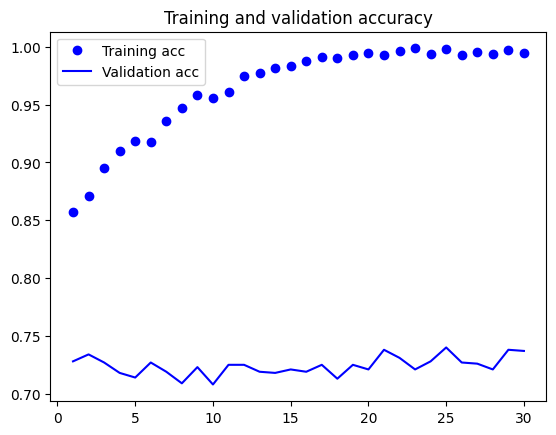

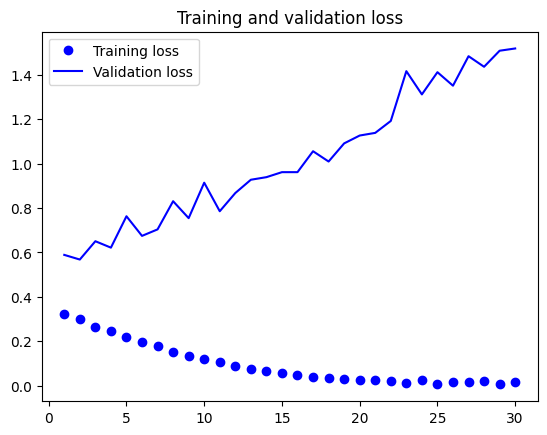

In [11]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [ ]:
!jupyter nbconvert --to html keras_cats_dogs_convnet.ipynb